In [1]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

In [2]:
import cv2

# Загрузка изображения
image_cv = cv2.imread('cookie.jpg')

# Проверка успешности загрузки
if image_cv is None:
    print("Ошибка: изображение не найдено или не удалось загрузить.")
else:
    print("Изображение успешно загружено.")

Изображение успешно загружено.


In [3]:
from IPython.display import display

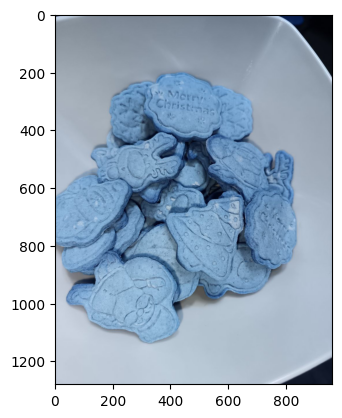

In [19]:
#Show the image with matplotlib
plt.imshow(image_cv)
plt.show()

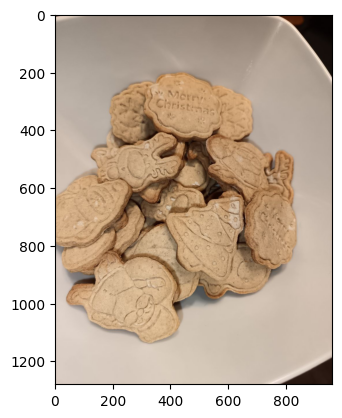

In [5]:
#Show the image with matplotlib
plt.imshow(image_cv)
plt.show()

In [6]:
# Convert the BGR image to RGB
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

# cvt_color  - можно сразу поменять местами каналы, для того чтобы в выводе цвета отображались корректно

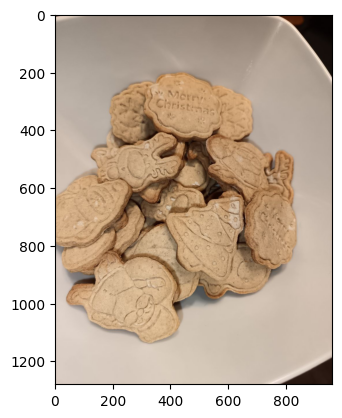

In [7]:
#Show the image with matplotlib
plt.imshow(image_rgb)
plt.show()

In [8]:
#### **Задание 1. Преобразования цветовых пространств**
# 1. Считать изображение в формате BGR.
# 2. Преобразовать его в HSV и LAB.
image_hsv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)
image_lab = cv2.cvtColor(image_cv, cv2.COLOR_BGR2LAB)

# 3. Выделить только канал Hue из HSV и канал L из LAB. Построить их гистограммы.
hue_channel = image_hsv[:, :, 0]
l_channel = image_lab[:, :, 0]


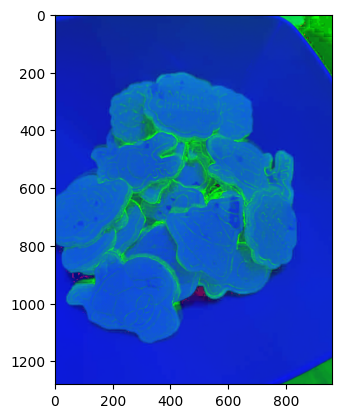

In [9]:
#Show the image with matplotlib
plt.imshow(image_hsv)
plt.show()

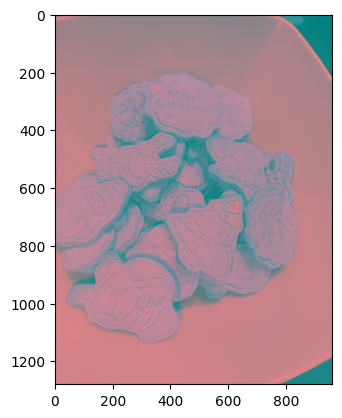

In [10]:
#Show the image with matplotlib
plt.imshow(image_lab)
plt.show()

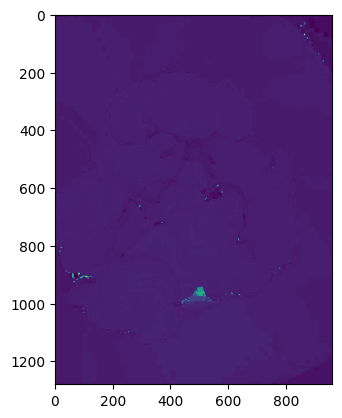

In [11]:
#Show the image with matplotlib
plt.imshow(hue_channel)
plt.show()

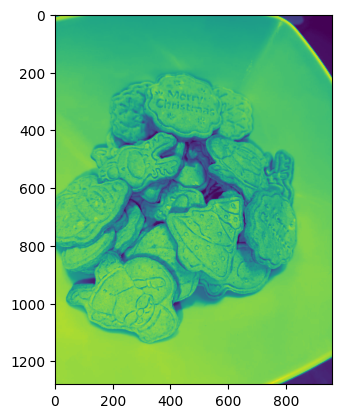

In [12]:
#Show the image with matplotlib
plt.imshow(l_channel)
plt.show()

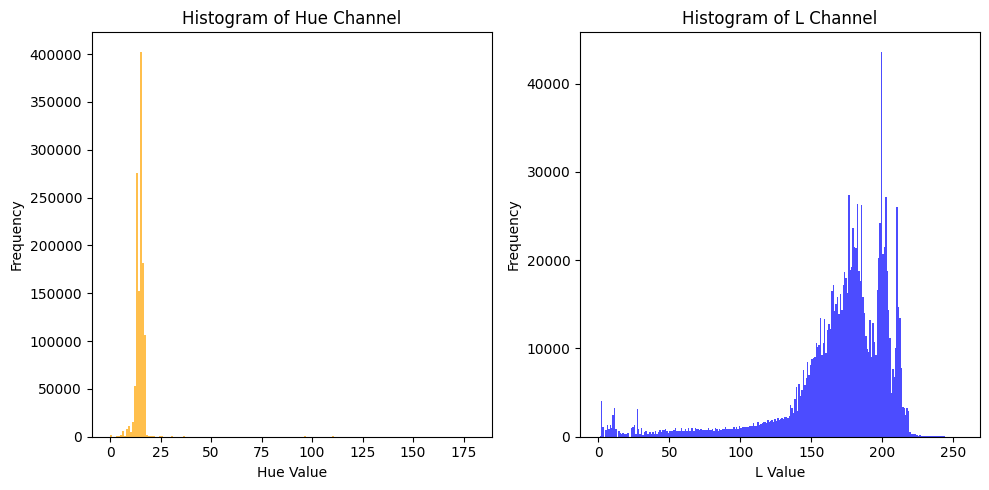

In [13]:
# 4. Построение гистограмм
plt.figure(figsize=(10, 5))

# Гистограмма канала Hue
plt.subplot(1, 2, 1)
plt.hist(hue_channel.ravel(), bins=180, range=[0, 180], color='orange', alpha=0.7)
plt.title('Histogram of Hue Channel')
plt.xlabel('Hue Value')
plt.ylabel('Frequency')

# Гистограмма канала L
plt.subplot(1, 2, 2)
plt.hist(l_channel.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title('Histogram of L Channel')
plt.xlabel('L Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### **Задание 2. Гистограммы цветовых пространств**
1. Построить гистограммы для каждого канала изображения в пространстве RGB.
2. Повторить то же для изображения, преобразованного в HSV.
3. Сравнить полученные гистограммы: в каком пространстве различия между цветами более явные?

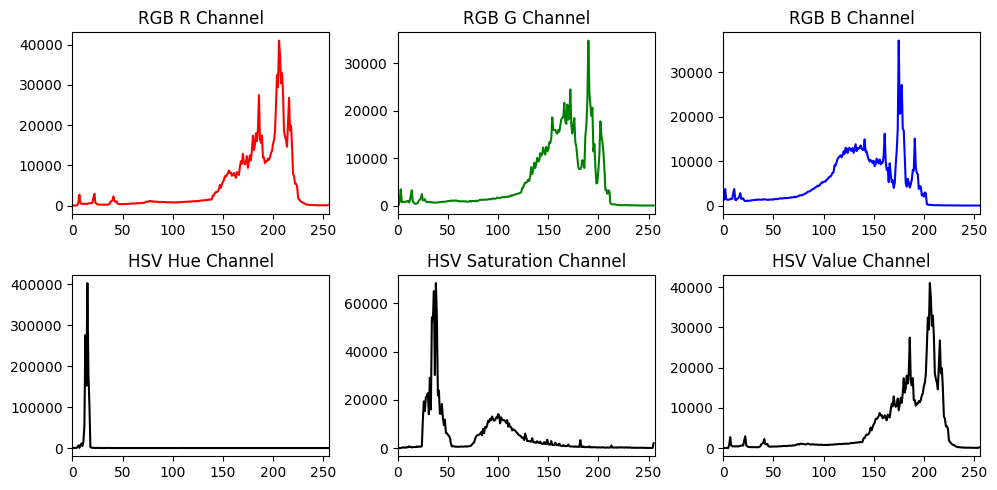

In [14]:
# 4. Построение гистограмм
plt.figure(figsize=(10, 5))

colors_rgb = ('r', 'g', 'b')
for i, color in enumerate(colors_rgb):
    plt.subplot(2, 3, i+1)
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.title(f'RGB {color.upper()} Channel')
    plt.xlim([0, 256])

# 2. Построение гистограмм для каждого канала в HSV
colors_hsv = ('Hue', 'Saturation', 'Value')
for i, label in enumerate(colors_hsv):
    plt.subplot(2, 3, i+4)
    hist = cv2.calcHist([image_hsv], [i], None, [256], [0, 256])
    plt.plot(hist, color='k')
    plt.title(f'HSV {label} Channel')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

#### **Задание 3. Выравнивание гистограмм**
1. Считать изображение в градациях серого.
2. Построить гистограмму и выполнить выравнивание с помощью метода EqualizeHist.
3. Применить CLAHE с различными параметрами (`clipLimit=2.0`, `tileGridSize=(8,8)` и `tileGridSize=(4,4)`).
4. Сравнить визуальные результаты и гистограммы.

In [20]:
# 1. Считать изображение в градациях серого.
image_gray = cv2.imread('cookie.jpg', cv2.IMREAD_GRAYSCALE)

In [21]:
# Функция для построения изображения и его гистограммы
def plot_image_and_histogram(image, title, ax_img, ax_hist):
    ax_img.imshow(image, cmap='gray')
    ax_img.set_title(title)
    ax_img.axis('off')

    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax_hist.plot(hist, color='black')
    ax_hist.set_xlim([0, 256])

IndexError: index 3 is out of bounds for axis 0 with size 3

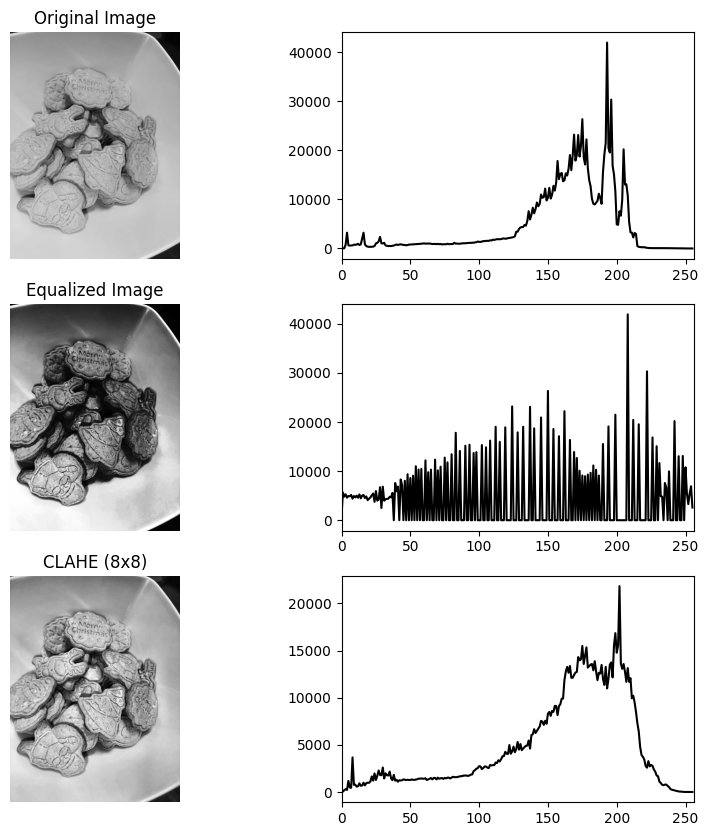

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Оригинальное изображение и гистограмма
plot_image_and_histogram(image_gray, 'Original Image', axs[0, 0], axs[0, 1])

# 2. Выравнивание гистограммы с EqualizeHist
image_eq = cv2.equalizeHist(image_gray)
plot_image_and_histogram(image_eq, 'Equalized Image', axs[1, 0], axs[1, 1])

# 3. Применение CLAHE с различными параметрами
clahe1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe1 = clahe1.apply(image_gray)
plot_image_and_histogram(image_clahe1, 'CLAHE (8x8)', axs[2, 0], axs[2, 1])

# сравниваем изображения с различными параметрами CLAHE
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
image_clahe2 = clahe2.apply(image_gray)
axs[3, 0].imshow(image_clahe2, cmap='gray')
axs[3, 0].set_title('CLAHE (4x4)')
axs[3, 0].axis('off')

# Гистограмма для CLAHE (4x4)
hist_clahe2 = cv2.calcHist([image_clahe2], [0], None, [256], [0, 256])
axs[3, 1].plot(hist_clahe2, color='black')
axs[3, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()

#### **Задание 4. Фиксированная пороговая сегментация**
1. Преобразовать изображение в градации серого.
2. Применить пороговую обработку с фиксированными значениями порога (50, 127, 200).
3. Визуально сравнить результаты и объяснить влияние порога на сегментацию.


#### **Задание 5. Пороговая сегментация с Оцу**
1. Преобразовать изображение в градации серого.
2. Применить метод Оцу для автоматического выбора порога.
3. Сравнить результат с фиксированным порогом из задания 4.

#### **Задание 6. Адаптивная пороговая обработка**
1. Преобразовать изображение в градации серого.
2. Применить адаптивную пороговую обработку с методами `cv2.ADAPTIVE_THRESH_MEAN_C` и `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`.
3. Визуально сравнить результаты с методом Оцу.


#### **Задание 7. Простая кластеризация K-means**
1. Считать цветное изображение и преобразовать его в формат LAB.
2. Выполнить кластеризацию K-means с количеством кластеров $k=3$.
3. Визуализировать результат кластеризации, показав области, соответствующие каждому кластеру.


#### **Задание 8. Сравнение кластеризации в разных цветовых пространствах**
1. Выполнить кластеризацию K-means для одного и того же изображения в пространствах RGB и LAB.
2. Установить $k=4$.
3. Сравнить визуальные результаты и сделать выводы, в каком пространстве кластеры лучше разделены.

#### **Задание 9. Использование каналов для кластеризации**
1. Выделить только канал Hue из HSV.
2. Выполнить кластеризацию K-means с $k=3$ для значений Hue.
3. Визуализировать результат кластеризации, интерпретируя выделенные цветовые зоны.

#### **Задание 10. Сегментация объекта с использованием кластеризации**
1. Считать изображение, содержащее объект на сложном фоне.
2. Выполнить кластеризацию K-means с $k=2$ в пространстве LAB.
3. Выделить объект, сопоставив кластеры с исходным изображением.

In [ ]:
cv2.imshow('Image', image_cv)

In [ ]:
import cv2

# Отображение изображения
cv2.imshow('OpenCV Image', image_cv)
# cv2.waitKey(0)  # Ожидание нажатия клавиши
# cv2.destroyAllWindows()

In [ ]:
from PIL import Image

# Отображение изображения
image_pil.show()

In [ ]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(image_cv)
plt.show()

In [ ]:
#Show the image with matplotlib
plt.imshow(image_cv[:,:,::-1])
plt.show()

In [ ]:
display(image_pil)

# Сохранить

In [ ]:
image_pil.save('image_pil.png')

In [ ]:
cv2.imwrite('image_cv.png', image_cv)

In [ ]:
cv2.imwrite('gray_image_cv.png', image_cv)

# Изменить размер

In [ ]:
image_pil_resize = image_pil.resize((300,300))

In [ ]:
plt.imshow(image_pil_resize)

In [ ]:
image_cv_resized = cv2.resize(image_cv[:,:,::-1],(300,300))

In [ ]:
plt.imshow(image_cv_resized)

# Обрезать Crop

In [ ]:
cropped_cv = image_cv[0:300, 0:300]

In [ ]:
plt.imshow(cropped_cv[:,:,::-1])

In [ ]:
cropped_pil = image_pil.crop((0, 0, 300, 300))

In [ ]:
plt.imshow(cropped_pil)

# Поворот изображения

In [ ]:
image_cv_rotated = cv2.rotate(image_cv, cv2.ROTATE_90_CLOCKWISE)

In [ ]:
plt.imshow(image_cv_rotated[:,:,::-1])

In [ ]:
image_pil_rotate = image_pil.rotate(90)

In [ ]:
plt.imshow(image_pil_rotate)

In [ ]:
image_pil_rotate2 = image_pil.rotate(90, expand=True)

In [ ]:
plt.imshow(image_pil_rotate2)

# Изменение контраста и яркости

In [ ]:
# Настройка параметров
alpha = 1.5  # Контраст (1.0-3.0)
beta = 30    # Яркость (0-100)

# Изменение контраста и яркости
adjusted_cv = cv2.convertScaleAbs(image_cv, alpha=alpha, beta=beta)

In [ ]:
plt.imshow(adjusted_cv[:,:,::-1])

In [ ]:
from PIL import Image, ImageEnhance

# Изменение контраста
enhancer_contrast = ImageEnhance.Contrast(image_pil)
contrast_pil = enhancer_contrast.enhance(1.5)  # Увеличение контраста на 50%
contrast_pil.save('contrast_pil.png')
print("Измененный контраст сохранен как 'contrast_pil.png'")

# Изменение яркости
enhancer_brightness = ImageEnhance.Brightness(image_pil)
brightness_pil = enhancer_brightness.enhance(1.3)  # Увеличение яркости на 30%

In [ ]:
plt.imshow(contrast_pil)

In [ ]:
plt.imshow(brightness_pil)

In [ ]:
b_channel, g_channel, r_channel = cv2.split(image_cv)

plt.imshow(r_channel)

In [ ]:
plt.imshow(b_channel)

In [ ]:
plt.imshow(g_channel)

In [ ]:
r, g, b = image_pil.split()

In [ ]:
plt.imshow(r)

In [ ]:
plt.imshow(g)

In [ ]:
plt.imshow(b)

In [ ]:
import cv2

# Загрузка цветного изображения
image_cv = cv2.imread('example.jpg')

# Загрузка изображения в градациях серого
gray_image_cv = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)